In [1]:
import numpy as np
from qiskit import(
  QuantumCircuit,QuantumRegister,ClassicalRegister,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

In [2]:
simulator_q = Aer.get_backend('qasm_simulator')
simulator_s= Aer.get_backend('statevector_simulator')
simulator_u = Aer.get_backend('unitary_simulator')

## Create a custom gate to use later in circuit

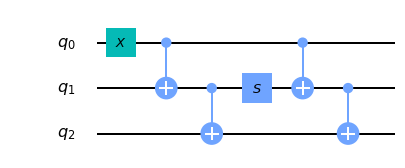

In [6]:
sub_circuit=QuantumCircuit(3,name='toggle_cx')
sub_circuit.x(0)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.s(1)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.draw(output='mpl')

In [7]:
#This step turns the sub_circuit to a gate
toggle_cx=sub_circuit.to_instruction()

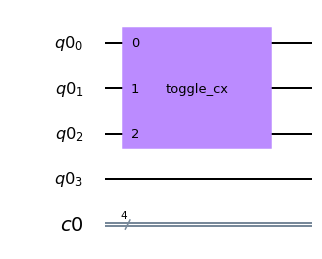

In [8]:
#Let's create another circuit and insert it
qr = QuantumRegister(4)
cr=ClassicalRegister(4)
new_qc = QuantumCircuit(qr,cr)
new_qc.append(toggle_cx, [qr[0],qr[1],qr[2]])
new_qc.draw(output='mpl')

outputstate:
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
UnitaryMatrix:
 [[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j

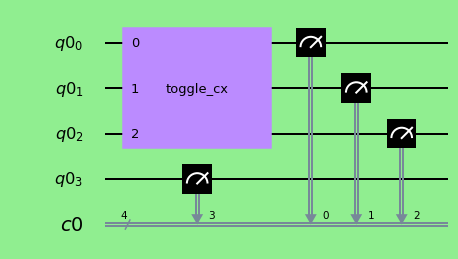

In [9]:
#Statevector part
result3=execute(new_qc,simulator_s).result()
outputstate = result3.get_statevector(new_qc, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result1=execute(new_qc,simulator_u).result()
unitary=result1.get_unitary(new_qc)
print ('UnitaryMatrix:\n',unitary)
#Now Quasm Simulator part where we need to measure
new_qc.measure([0,1,2,3],[0,1,2,3])
result2=execute(new_qc,simulator_q).result()
print ("counts:\n",result2.get_counts(new_qc))
style = {'backgroundcolor': 'lightgreen'}
new_qc.draw(output='mpl',style=style)